In [1]:
# Script to run presentation
#run in anaconda, cd to directory and run the code below
# jupyter nbconvert MarkDown_Slides.ipynb --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True --no-input

# Analysis of Tablets from Amazon 

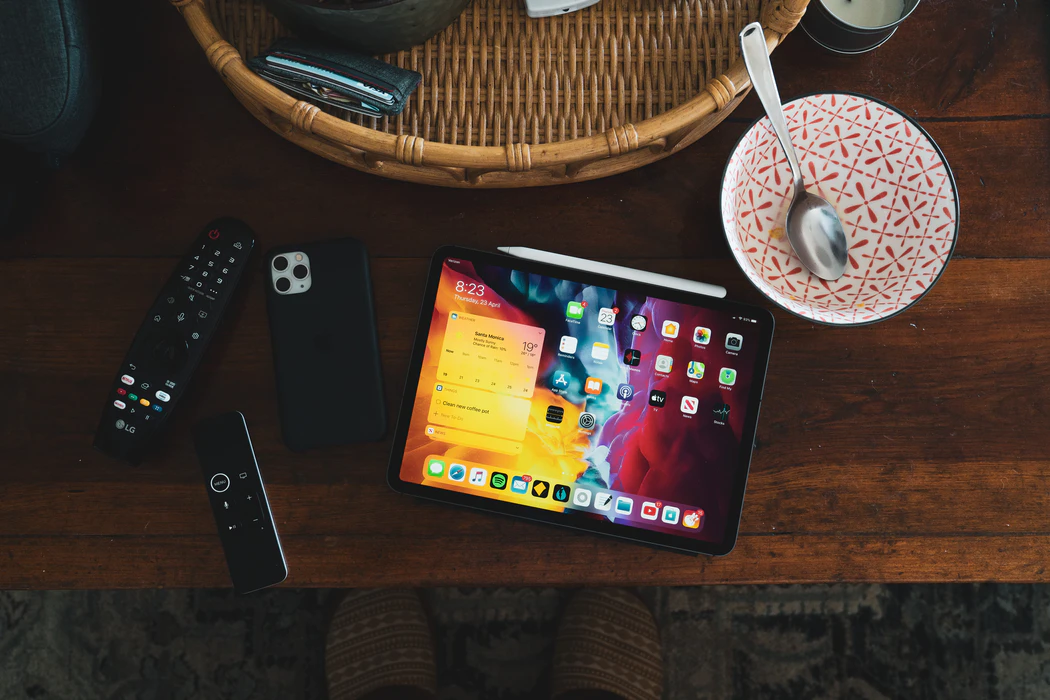


#### Analyzing data of all tablets from amazon.com. Scraped using Scrapy
#### Goal, to analyze differences in products and compare to Amazons brand of tablets, Fire HD tablets. 
#### Products were analyzed by Rating of product in stars, number of reviews, popularity, and commonly used words by the seller to market their product. 

# Challenges in Scraping Amazon

- Multiple xpaths and tags were needed in order to properply scrape data, and even then some did not scrape appropriately

- Wanted to Scrape Technical details table for system specs however there was no consistency in any of the table formats or tags. Some Technical details page only showed an image rather than a table making it difficult to scrape

- Thus the description was parsed and word cloud was used to see what the common specs were

# First lets read the csv file generated by scrapy

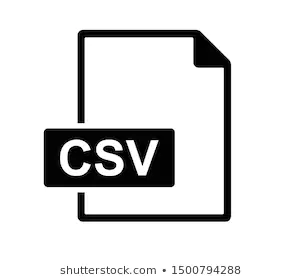

## All Pages of Tablets from amazon scrapped

In [2]:
import pandas as pd 

#load csv file scraped from Amazon.com in master folder 
df = pd.read_csv("data.csv")
df

,brand,description,num_reviews,price,rating,title
0,Dragon,",,[ Native and Latest Android OS ] The Max10 u...",816 ratings,$149.99,4.4 out of 5 stars,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,",,【Latest Ver. Tablets】: Android 8.1 Go OS, 1....","2,099 ratings",$91.77,3.9 out of 5 stars,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,",,Faster and More responsive: Equipped with th...","1,711 ratings",$74.99,4.4 out of 5 stars,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,",,[Strong and Powerful Performance]: Do what y...","4,595 ratings",$119.99,4.4 out of 5 stars,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
4,Amazon,A Certified Refurbished Fire 7 Tablet is refur...,"2,140 ratings",$59.99,4.4 out of 5 stars,"Certified Refurbished Fire 7 Tablet (7"" displa..."
...,...,...,...,...,...,...
9571,Fusion5,",,10.1 INCH POWERFUL OCTA-CORE TABLET PC WITH ...",NaN,$159.95,NaN,"Fusion5 10.1"" 2in1 Google Certified Android La..."
9572,Samsung,",,Minimal bezel. Maximum view. Watch, stream a...","8,882 ratings",$206.68,4.7 out of 5 stars,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","30,108 ratings",$89.99,4.5 out of 5 stars,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


- Using Scrapy I was able to scrape the following variables: Brand, Description, number of reviews, price, rating, and title
- Scrapy was able to scrape over 9000 products!
- However we want to omit 'Renewed' and 'Refurbished' entries to prevent duplicates 
- We also want to remove products which are not tablets
<br>
<br>
<br>

In [3]:
#Cleaning out entries which are not tablets
df =df[df['title'].str.contains('Tablet|tablet|Tab|tab|iPad| Tablets|tablets|M-Fire')]
#Clear out cases
df =df[df['title'].str.contains('Case|case')==False]
#Clear out no brand items
df =df[df['brand'].str.contains('Nobrand|nobrand')==False]
df

,brand,description,num_reviews,price,rating,title
0,Dragon,",,[ Native and Latest Android OS ] The Max10 u...",816 ratings,$149.99,4.4 out of 5 stars,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,",,【Latest Ver. Tablets】: Android 8.1 Go OS, 1....","2,099 ratings",$91.77,3.9 out of 5 stars,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,",,Faster and More responsive: Equipped with th...","1,711 ratings",$74.99,4.4 out of 5 stars,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,",,[Strong and Powerful Performance]: Do what y...","4,595 ratings",$119.99,4.4 out of 5 stars,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
4,Amazon,A Certified Refurbished Fire 7 Tablet is refur...,"2,140 ratings",$59.99,4.4 out of 5 stars,"Certified Refurbished Fire 7 Tablet (7"" displa..."
...,...,...,...,...,...,...
9571,Fusion5,",,10.1 INCH POWERFUL OCTA-CORE TABLET PC WITH ...",NaN,$159.95,NaN,"Fusion5 10.1"" 2in1 Google Certified Android La..."
9572,Samsung,",,Minimal bezel. Maximum view. Watch, stream a...","8,882 ratings",$206.68,4.7 out of 5 stars,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","30,108 ratings",$89.99,4.5 out of 5 stars,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


### Removal of refurbished and renewed devices

In [4]:
import warnings; warnings.simplefilter('ignore') #Ignore warning 
df =df[df['title'].str.contains('(Renewed)|refurbished|(Refurbished)|Refurbished')==False]
df =df[df['description'].str.contains('Refurbished|refurbished|Renewed')==False]
df =df[df['brand'].str.contains('Renewed')==False] #Remove devices under brand : Amazon Renewed, AniaStore is a brand of spark plugs that come up when searching tablets on amazon
df


,brand,description,num_reviews,price,rating,title
0,Dragon,",,[ Native and Latest Android OS ] The Max10 u...",816 ratings,$149.99,4.4 out of 5 stars,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,",,【Latest Ver. Tablets】: Android 8.1 Go OS, 1....","2,099 ratings",$91.77,3.9 out of 5 stars,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,",,Faster and More responsive: Equipped with th...","1,711 ratings",$74.99,4.4 out of 5 stars,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,",,[Strong and Powerful Performance]: Do what y...","4,595 ratings",$119.99,4.4 out of 5 stars,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
5,PRITOM,",,★[HIGH PERFORMANCE ANDROID TABLET ] - Pritom...",235 ratings,$89.99,4.0 out of 5 stars,Android Tablet Pritom 10 inch Android 9.0 OS T...
...,...,...,...,...,...,...
9571,Fusion5,",,10.1 INCH POWERFUL OCTA-CORE TABLET PC WITH ...",NaN,$159.95,NaN,"Fusion5 10.1"" 2in1 Google Certified Android La..."
9572,Samsung,",,Minimal bezel. Maximum view. Watch, stream a...","8,882 ratings",$206.68,4.7 out of 5 stars,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","30,108 ratings",$89.99,4.5 out of 5 stars,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


### Export csv of cleaned data 

In [5]:
#Inspect csv file to insure renewed and refurbished do not show up. Uncomment to test
df.to_csv('dataclean.csv')

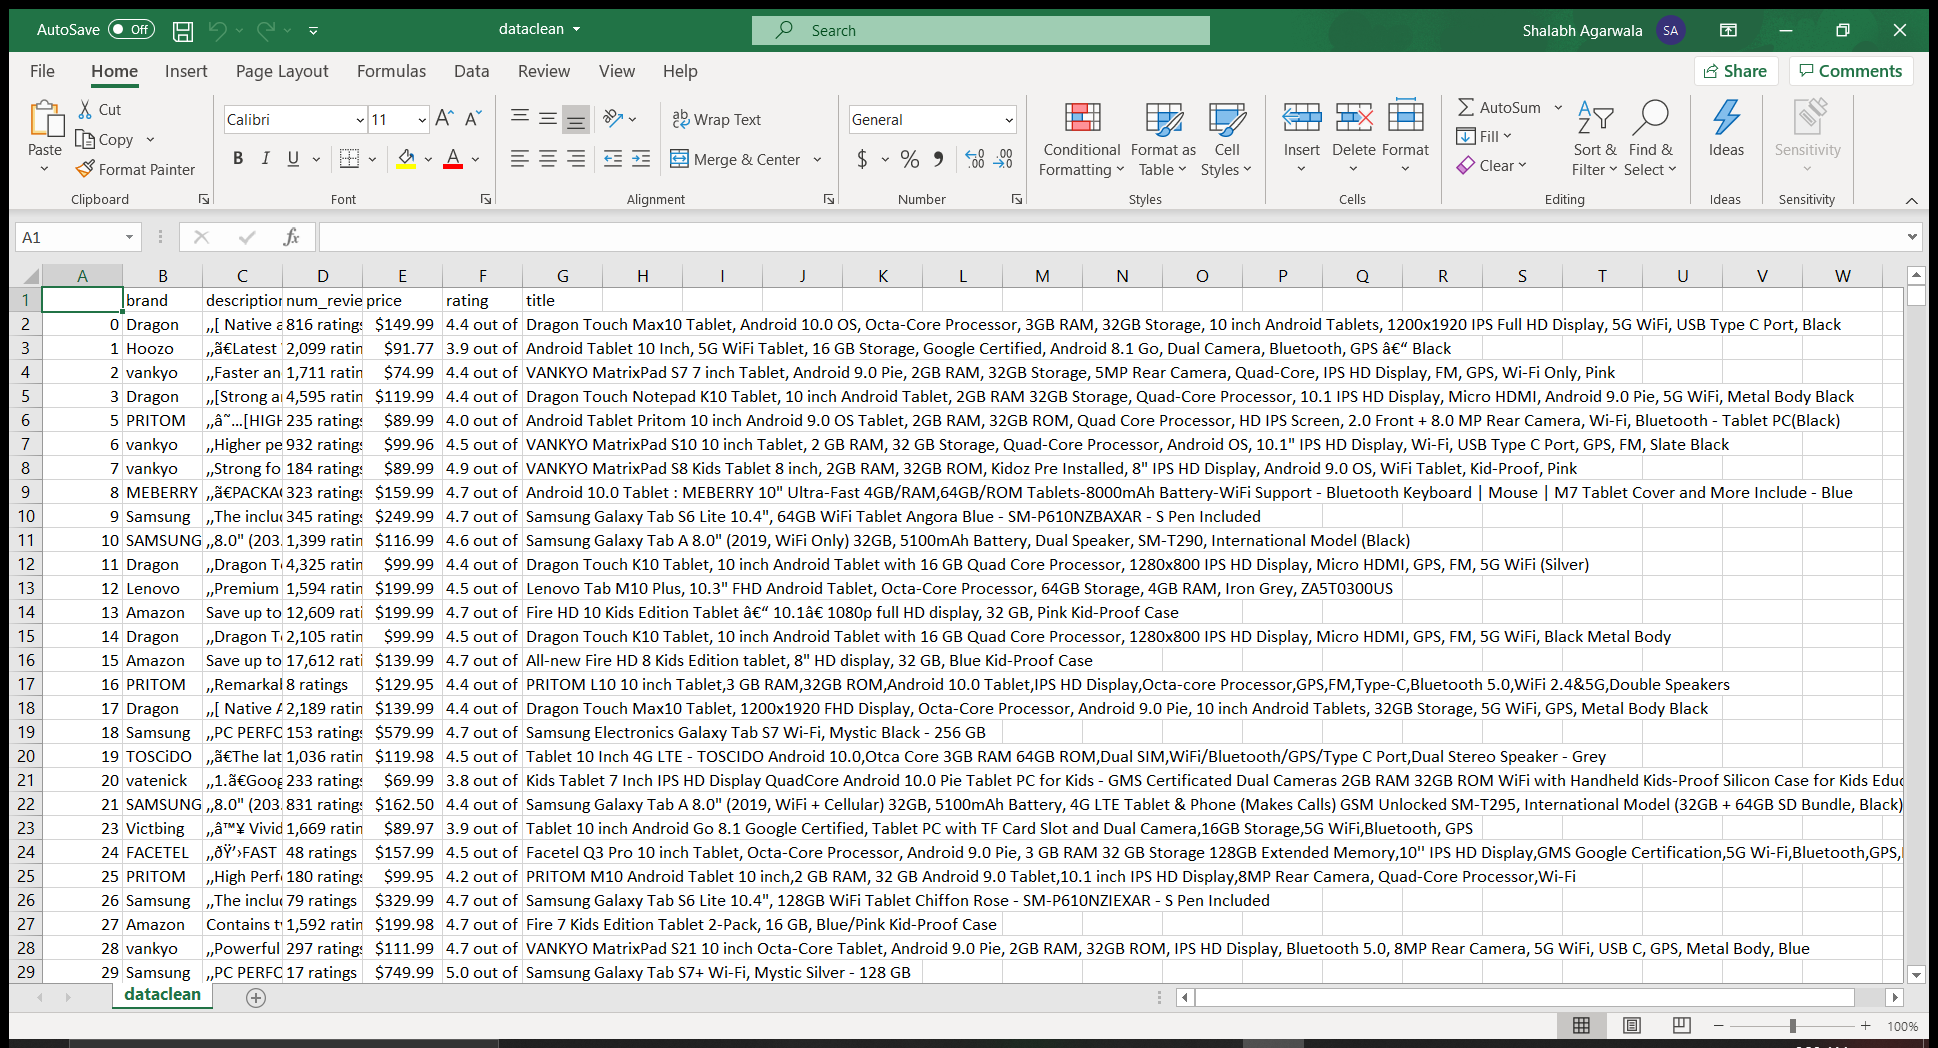

- Upon inspecting the csv file, all refurbished and renewed devices have been omitted! 
- Now we can analyze only orginal products without having to worry about inflated values due to duplicates 
<br>
<br>
<br>
<br>
<br>

## Most Listed Tablet Brands on Amazon

##### Value counts of brands 

In [6]:
brands_df = df['brand'].value_counts()
brands_df.head()

Dongdexiu    303
Microsoft    166
SAMSUNG      145
Oudi         135
Chichi       123
Name: brand, dtype: int64

#### Interestingly the brands with the most products on Amazon are:
- Dongdexiu
- Microsoft
- Samsung
- Oudi
- Chichi 


- Originally "No Brand" was the highest listed but these were omitted

## Most Popular Tablets by number of ratings 

#### If you google most popular tablet brands these come up:
- Apple
- Samsung
- Amazon
- Lenovo
- Microsoft
- ASUS
- Google


#### Upon inspecting the data these brands were shown to have devices with number of reviews over 1,000 and at least a 4-star rating. 

### Lets sort the data frames by Top brands and number of reviews 

In [7]:
df['reviews_float'] = df['num_reviews'].str.replace(r'\D+', '').astype(float)
sort_ratings_df = df.sort_values(by=['reviews_float'], ascending= False)
sort_ratings_df


,brand,description,num_reviews,price,rating,title,reviews_float
9575,Amazon,"7"" IPS display; 16 or 32 GB of internal storag...","110,184 ratings",$49.99,4.4 out of 5 stars,"Fire 7 tablet (7"" display, 16 GB) - Black",110184.0
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display...",77593.0
46,Amazon,"8"" HD display; 16 or 32 GB of internal storage...","76,789 ratings",NaN,4.4 out of 5 stars,"Fire HD 8 Tablet (8"" HD Display, 32 GB) - Blac...",76789.0
9464,Amazon,"Up to 12 hours of battery life, a vibrant 8"" H...","55,657 ratings",NaN,4.2 out of 5 stars,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 16...",55657.0
9439,Apple,"10. 2-inch Retina display,A10 Fusion chip,Touc...","45,831 ratings",NaN,4.8 out of 5 stars,"Apple iPad (10.2-inch, Wi-Fi, 32GB) - Gold (Pr...",45831.0
...,...,...,...,...,...,...,...
9393,ivsi,",,10.1-inch Google Certified Tablet. 10.1"" tou...",NaN,$100.00,NaN,IVSI 10.1-inch Ultra-Thin Tablet Computer Onli...,NaN
9397,YELLYOUTH,",,YELLYOUTH 10 inch Tablet Android 9.0 Pie - T...",NaN,$89.99,NaN,YELLYOUTH 10 inch Tablet Android 9.0 Pie 4GB R...,NaN
9431,ZTE,",,Use Anywhere: Unlocked GSM/LTE or WiFi : Fre...",NaN,$144.99,NaN,"ZTE K92 Primetime Unlocked GSM 10"" Android Tab...",NaN
9467,vankyo,",,Outstanding Performance: Features 4GB RAM an...",NaN,$209.99,NaN,"VANKYO MatrixPad P31 10 inch Octa-Core Tablet,...",NaN


In [8]:
apple_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('Apple|apple')]
apple_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
9439,Apple,"10. 2-inch Retina display,A10 Fusion chip,Touc...","45,831 ratings",NaN,4.8 out of 5 stars,"Apple iPad (10.2-inch, Wi-Fi, 32GB) - Gold (Pr...",45831.0
1164,Apple,"9.7-inch Retina display,A10 Fusion chip,Touch ...","16,445 ratings",$459.00,4.8 out of 5 stars,"Apple iPad (Wi-Fi + Cellular, 32GB) - Silver (...",16445.0
1214,Apple,"9.7-inch Retina display,A10 Fusion chip,Touch ...","16,445 ratings",$459.00,4.8 out of 5 stars,"Apple iPad (Wi-Fi + Cellular, 32GB) - Silver (...",16445.0
9504,Apple,7.9-inch Retina Display with True Tone and wid...,"7,113 ratings",$384.99,4.8 out of 5 stars,"Apple iPad mini (Wi-Fi, 64GB) - Gold (Latest M...",7113.0
469,Apple,",,Apple iOS 8; 9.7-Inch Retina Display; 2048x1...","6,426 ratings",NaN,4.7 out of 5 stars,Apple iPad Air 2 MGTX2LL/A 9.7-inches 128 GB T...,6426.0


In [9]:
samsung_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('SAMSUNG|samsung|Samsung')]
samsung_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
9572,Samsung,",,Minimal bezel. Maximum view. Watch, stream a...","8,882 ratings",$206.68,4.7 out of 5 stars,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...,8882.0
9570,Samsung,",,Minimum bezel. Maximum view: Designed with a...","5,572 ratings",$99.99,4.6 out of 5 stars,"SAMSUNG SM-T290NZSAXAR, Galaxy Tab A 8.0"" 32 G...",5572.0
9175,Samsung,",,Android 4.4 Kit Kat OS, 1.2 GHz quad-core pr...","4,271 ratings",NaN,4.4 out of 5 stars,"Samsung Galaxy Tab 4 (7-Inch, White)",4271.0
481,Samsung,",,1.6 GHz exynos 7870 octa core Processor. 10....","3,813 ratings",NaN,4.5 out of 5 stars,Samsung Galaxy Tab A SM-T580NZKAXAR 10.1-Inch ...,3813.0
308,SAMSUNG,",,Android 4.4 Kit Kat OS, 1.2 GHz quad-core Qu...","3,006 ratings",NaN,4.3 out of 5 stars,Samsung Galaxy Tab 4 SM-T530NYKAXAR 10.1-Inch ...,3006.0


In [10]:
lenovo_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('Lenovo|lenovo')]
lenovo_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
382,Lenovo,",,CES WINNER: Smart Tab is the winner of the 2...","2,941 ratings",$249.99,3.9 out of 5 stars,"Lenovo Smart Tab M10, 10.1-Inch Alexa-Enabled ...",2941.0
9547,Lenovo,",,The Lenovo Tab M10 (HD) is one impressive fa...","2,017 ratings",$149.99,4.3 out of 5 stars,"Lenovo Tab M10 HD 10.1"" Tablet, Android 9.0, 1...",2017.0
786,Lenovo,",,Android 4.4 KitKat (Up gradable up to latest...","1,596 ratings",NaN,4.0 out of 5 stars,"Lenovo TAB2 A10 - 10.1"" Tablet (ARM Cortex A53...",1596.0
12,Lenovo,",,Premium look & feel with metal back cover an...","1,594 ratings",$199.99,4.5 out of 5 stars,"Lenovo Tab M10 Plus, 10.3"" FHD Android Tablet,...",1594.0
9301,Lenovo,",,A big-screen android tablet optimized for en...","1,186 ratings",$199.99,4.0 out of 5 stars,"Lenovo Yoga Tab 3 - HD 8"" Android Tablet Compu...",1186.0


In [11]:
amazon_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('Amazon|amazon')]
amazon_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
9575,Amazon,"7"" IPS display; 16 or 32 GB of internal storag...","110,184 ratings",$49.99,4.4 out of 5 stars,"Fire 7 tablet (7"" display, 16 GB) - Black",110184.0
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display...",77593.0
46,Amazon,"8"" HD display; 16 or 32 GB of internal storage...","76,789 ratings",NaN,4.4 out of 5 stars,"Fire HD 8 Tablet (8"" HD Display, 32 GB) - Blac...",76789.0
9464,Amazon,"Up to 12 hours of battery life, a vibrant 8"" H...","55,657 ratings",NaN,4.2 out of 5 stars,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 16...",55657.0
9229,Amazon,"7"" IPS display; 8 or 16 GB of internal storage...","30,838 ratings",NaN,4.0 out of 5 stars,"Fire 7 Tablet (7"" display, 16 GB) - Black - (P...",30838.0


In [12]:
microsoft_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('Microsoft|microsoft')]
microsoft_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
789,Microsoft,",,Intel 4th Generation Core i5 Processor,12-In...",873 ratings,$643.49,4.3 out of 5 stars,Microsoft Surface Pro 3 MQ2-00001 12-Inch Full...,873.0
8233,Microsoft,",,Intel 4th Generation Core i5 Processor,12-In...",669 ratings,"$1,099.99",4.0 out of 5 stars,Microsoft Surface Pro 3 PS2-00001 12-Inch Pro ...,669.0
1977,Microsoft,",,i5 processor with Intel HD Graphics 4000,4GB...",556 ratings,$599.99,4.4 out of 5 stars,Microsoft Surface Pro Tablet 128 GB Hard Drive...,556.0
8185,Microsoft,",,i5 processor with Intel HD Graphics 4000,4GB...",556 ratings,$599.99,4.4 out of 5 stars,Microsoft Surface Pro Tablet 128 GB Hard Drive...,556.0
121,Microsoft,",,Windows 10, 10.8-Inch Display.,Processor Qua...",498 ratings,$349.99,3.9 out of 5 stars,"Microsoft Surface 3 Tablet (10.8-Inch, 64 GB, ...",498.0


In [13]:
asus_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('ASUS|asus|Asus')]
asus_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
1063,ASUS,",,Android 4.1 Jelly Bean, 7 inches Display,NVI...","2,050 ratings",$289.98,3.9 out of 5 stars,"ASUS Google Nexus 7 Tablet (7-Inch, 32GB) 2012...",2050.0
8927,ASUS,",,7-Inch Display,Quad Core 1.2 GHz,16 GB Flash...","1,694 ratings",NaN,4.0 out of 5 stars,"ASUS MeMOPad HD 7-Inch 16 GB Tablet, Blue (ME1...",1694.0
8205,ASUS,",,9.7"" 2K IPS Display (2048 x 1536) with ASUS ...","1,599 ratings",NaN,3.8 out of 5 stars,"ASUS ZenPad 3S 10 9.7"" (2048x1536), 4GB RAM, 6...",1599.0
620,ASUS,",,8"" IPS Display (2048 x 1536) with ASUS TruVi...","1,558 ratings",NaN,3.8 out of 5 stars,"ASUS ZenPad S8 8"" (2048x1536) 32GB Black Table...",1558.0
1423,ASUS,",,Android 4.0 Ice Cream Sandwich, 10.1 inches ...","1,381 ratings",NaN,3.9 out of 5 stars,ASUS TF300T-A1-BL 10.1-Inch 16GB Tablet (Blue),1381.0


In [14]:
google_df =sort_ratings_df[sort_ratings_df['brand'].str.contains('GOOGLE|Google|google')]
google_df.head()

,brand,description,num_reviews,price,rating,title,reviews_float
490,Google,",,7-inch tablet screen, 1200x1920 (323 ppi), L...","3,928 ratings",NaN,4.3 out of 5 stars,"Nexus 7 from Google (7-Inch, 16 GB, Black) by ...",3928.0
671,Google,", 7 inches Display,Qualcomm Snapdragon S4 1.5 ...","3,113 ratings",$299.99,4.2 out of 5 stars,"ASUS New Nexus 7 FHD Tablet (7-Inch, 32GB, Black)",3113.0
141,Google,",,Keyboard and pen/stylus are sold separately,...",305 ratings,$998.99,4.1 out of 5 stars,Google Pixel Slate 12.3-Inch 2 in 1 Tablet Int...,305.0
686,Google,",,308ppi,10.2 inches,8mp rear camera 2 mp fron...",49 ratings,NaN,4.0 out of 5 stars,Google Pixel C Tablet 32gb Silver Aluminum WiF...,49.0
9041,Google,",,308ppi,10.2 inches,8mp rear camera 2 mp fron...",49 ratings,NaN,4.0 out of 5 stars,Google Pixel C Tablet 32gb Silver Aluminum WiF...,49.0


# Popularity by number of reviews

In [15]:
#TOTAL REVIEWS BY BRANDS
var1 = apple_df['reviews_float'].sum(axis = 0, skipna = True)
var2 = samsung_df['reviews_float'].sum(axis = 0, skipna = True)
var3 = lenovo_df['reviews_float'].sum(axis = 0, skipna = True)
var4 = amazon_df['reviews_float'].sum(axis = 0, skipna = True)
var5 = microsoft_df['reviews_float'].sum(axis = 0, skipna = True)
var6 = asus_df['reviews_float'].sum(axis = 0, skipna = True)
var7 = google_df['reviews_float'].sum(axis = 0, skipna = True)
print("Apple", var1)
print("Samsung", var2)
print("Lenovo", var3)
print("Amazon", var4)
print("Microsoft", var5)
print("ASUS", var6)
print("Google", var7)
 
d = {'Brand': ["Apple", "Samsung", "Lenovo", "Amazon", "Microsoft", "ASUS", "Google"], 'Total Reviews': [var1, var2, var3, var4, var5, var6, var7]}
reviews_list = pd.DataFrame(data=d)

reviews_list = reviews_list.sort_values(by='Total Reviews', ascending = False)

reviews_list


Apple 129952.0
Samsung 85809.0
Lenovo 14376.0
Amazon 434741.0
Microsoft 5858.0
ASUS 23041.0
Google 7454.0


,Brand,Total Reviews
3,Amazon,434741.0
0,Apple,129952.0
1,Samsung,85809.0
5,ASUS,23041.0
2,Lenovo,14376.0
6,Google,7454.0
4,Microsoft,5858.0


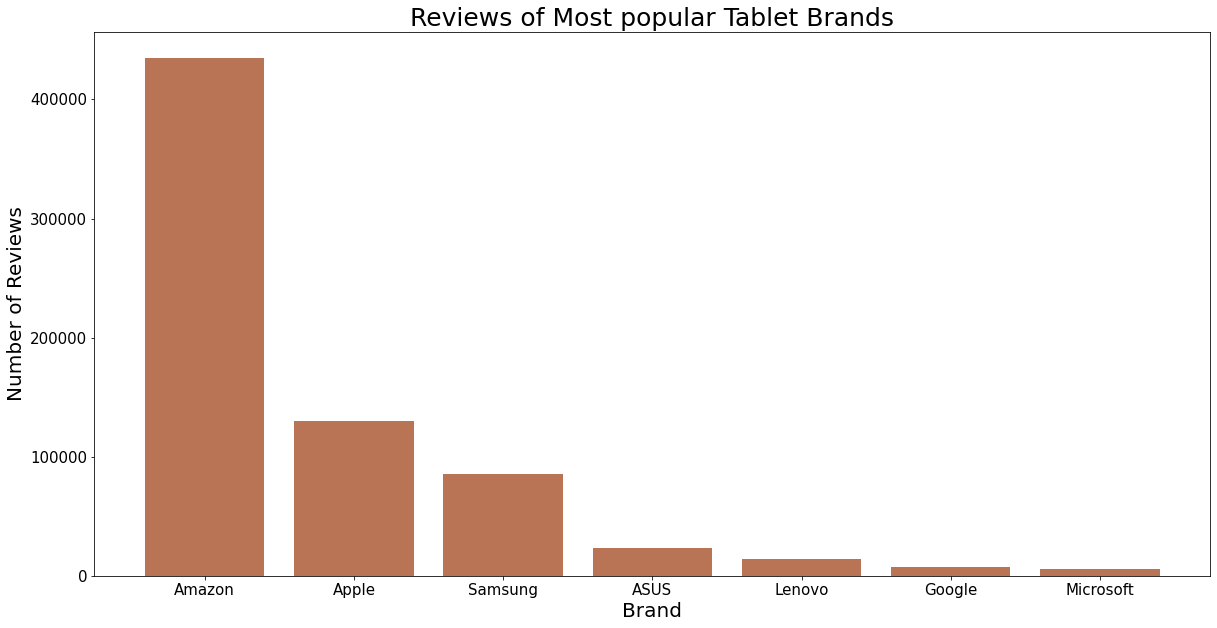

In [16]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize=(20,10))
plt.bar(reviews_list['Brand'], reviews_list['Total Reviews'], color="#b97455")


plt.xlabel("Brand", fontsize = 20)
plt.ylabel("Number of Reviews", fontsize= 20)
plt.title("Reviews of Most popular Tablet Brands", fontsize = 25)
plt.savefig("tmp/Reviews_Most_Pop_Tabs.svg")
plt.show()

In [17]:
reviews_list.reset_index(drop=True, inplace=True)
reviews_list

,Brand,Total Reviews
0,Amazon,434741.0
1,Apple,129952.0
2,Samsung,85809.0
3,ASUS,23041.0
4,Lenovo,14376.0
5,Google,7454.0
6,Microsoft,5858.0


<br>
<br>
<br>
<br>

#### Amazon Fire HD being the most highly reviewed tablets with some having nearly 100,000 reviews or more! Making their tablets the most reviewed products on the Amazon market Place

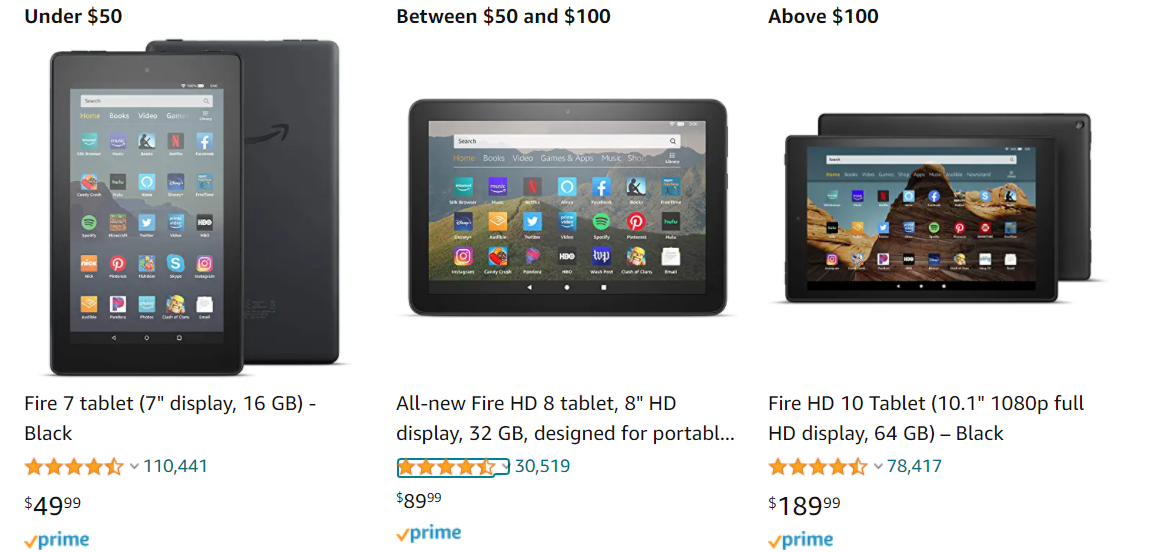

## Analyzing the Overall rating Scores of Tablets to Amazons Fire HD. 

In [18]:
#Count total values of ratings, group similar ones
rating_df = df['rating'].value_counts()
rating_df

4.0 out of 5 stars    104
5.0 out of 5 stars     99
3.5 out of 5 stars     83
3.7 out of 5 stars     79
3.9 out of 5 stars     78
4.1 out of 5 stars     71
3.8 out of 5 stars     67
4.2 out of 5 stars     66
3.6 out of 5 stars     64
4.5 out of 5 stars     63
4.6 out of 5 stars     55
3.0 out of 5 stars     55
4.4 out of 5 stars     55
4.3 out of 5 stars     50
3.3 out of 5 stars     47
3.4 out of 5 stars     44
4.7 out of 5 stars     42
3.2 out of 5 stars     41
3.1 out of 5 stars     35
1.0 out of 5 stars     33
4.8 out of 5 stars     27
2.0 out of 5 stars     21
2.6 out of 5 stars     19
2.9 out of 5 stars     18
2.8 out of 5 stars     15
2.5 out of 5 stars     13
2.7 out of 5 stars     12
2.3 out of 5 stars      6
4.9 out of 5 stars      6
1.9 out of 5 stars      5
2.4 out of 5 stars      3
2.2 out of 5 stars      3
1.6 out of 5 stars      3
2.1 out of 5 stars      2
1.7 out of 5 stars      2
1.3 out of 5 stars      1
1.4 out of 5 stars      1
1.8 out of 5 stars      1
Name: rating

In [19]:
#Lets look at a general Picture of what rating tablets on amazon tend to get.
#We will remove the decial value and group all ratings together by a single integer (1-5)
df['first'] = df['rating'].str.split('.').str[0]

rating_group_df = df['first'].value_counts().sort_index()
rating_group_df



1     46
2    112
3    593
4    539
5     99
Name: first, dtype: int64

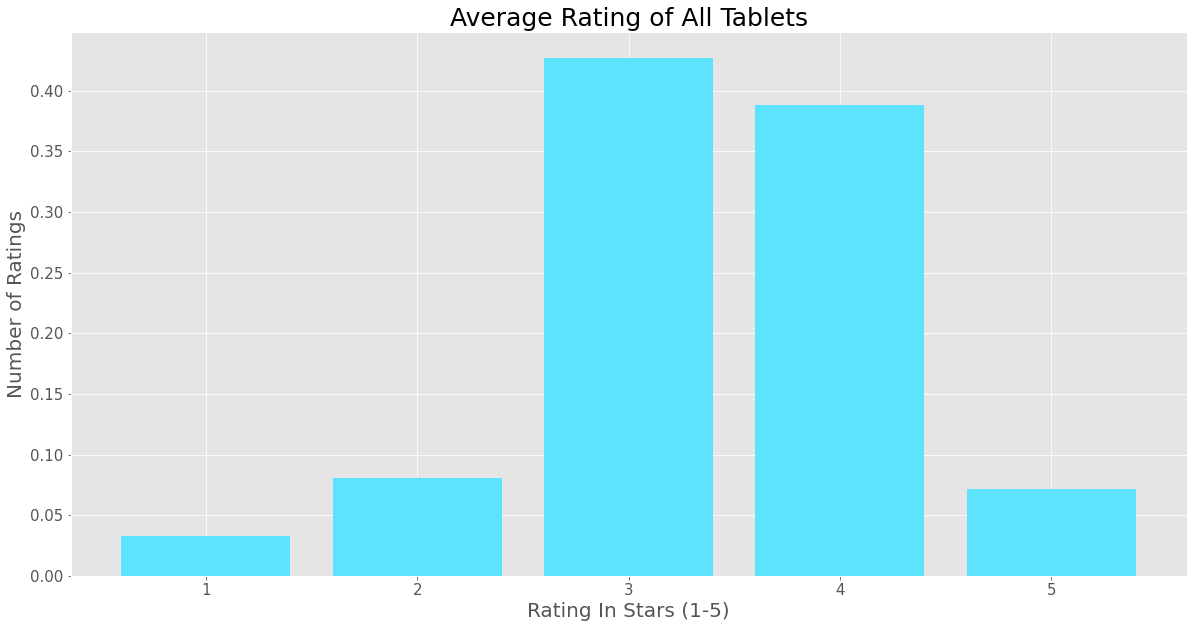

In [20]:
#Now lets create a bar chart 
import numpy as np
plt.style.use('ggplot')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize=(20,10))
summarised_results = rating_group_df
plt.bar(summarised_results.keys(), summarised_results.values/ summarised_results.sum(), color="#5ee3ff")


plt.xlabel("Rating In Stars (1-5)", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.title("Average Rating of All Tablets", fontsize = 25)
plt.savefig("tmp/All_Tablets_Ratings.svg")
plt.show()

- As you can see from the bar chart most tablets have a fairly good Rating between 3-4+ stars 
- Roughly 40% for both 3 star and 4 star. And ~ 7.5% for 5 star. 
- From this we can infer that overall most customers are satisfied with their tablet purchase from Amazon (88% have 3-star rating or higher)
<br>
<br>
<br>
<br>
<br>
<br>

## Now how does Amazons Tablets Compare? 

In [21]:
#Lets first sort the dataframe to only list items with the title containing "Fire", the name of Amazons tablet
#Search title for Fire 
fire_df=df[df['title'].str.contains("Fire")]
fire_df


,brand,description,num_reviews,price,rating,title,reviews_float,first
46,Amazon,"8"" HD display; 16 or 32 GB of internal storage...","76,789 ratings",NaN,4.4 out of 5 stars,"Fire HD 8 Tablet (8"" HD Display, 32 GB) - Blac...",76789.0,4
100,Amazon,Our largest display on our thinnest tablet yet...,"16,758 ratings",NaN,4.0 out of 5 stars,"Fire HD 10 Tablet with Alexa, 10.1"" HD Display...",16758.0,4
345,Amazon,"Our most powerful tablet ever,All-new Amazon U...","6,587 ratings",NaN,4.2 out of 5 stars,"Fire HDX 8.9 Tablet, 8.9"" HDX Display, Wi-Fi, ...",6587.0,4
359,Amazon,"Our most powerful tablet ever,All-new Amazon U...","6,587 ratings",NaN,4.2 out of 5 stars,"Fire HDX 8.9 Tablet, 8.9"" HDX Display, Wi-Fi, ...",6587.0,4
387,Amazon,Save up to $99 on a full-featured Fire HD 10 t...,3 ratings,$234.98,4.6 out of 5 stars,Fire HD 10 Kids Tablet 32GB Blue with Poptime ...,3.0,4
...,...,...,...,...,...,...,...,...
9540,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","6,978 ratings",$109.99,4.5 out of 5 stars,"All-new Fire HD 8 Plus tablet, HD display, 32 ...",6978.0,4
9566,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","6,985 ratings",$109.99,4.5 out of 5 stars,"All-new Fire HD 8 Plus tablet, HD display, 32 ...",6985.0,4
9573,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","30,108 ratings",$89.99,4.5 out of 5 stars,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB...",30108.0,4
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display...",77593.0,4


In [22]:
rating_fire_df = fire_df['rating'].value_counts()
rating_fire_df

4.6 out of 5 stars    6
4.2 out of 5 stars    5
5.0 out of 5 stars    5
4.5 out of 5 stars    4
4.0 out of 5 stars    4
4.4 out of 5 stars    2
2.0 out of 5 stars    2
4.3 out of 5 stars    1
3.5 out of 5 stars    1
3.3 out of 5 stars    1
4.7 out of 5 stars    1
Name: rating, dtype: int64

In [23]:
fire_df['first'] = fire_df['rating'].str.split('.').str[0]

fire_rating_group_df = fire_df['first'].value_counts().sort_index()
fire_rating_group_df




2     2
3     2
4    23
5     5
Name: first, dtype: int64

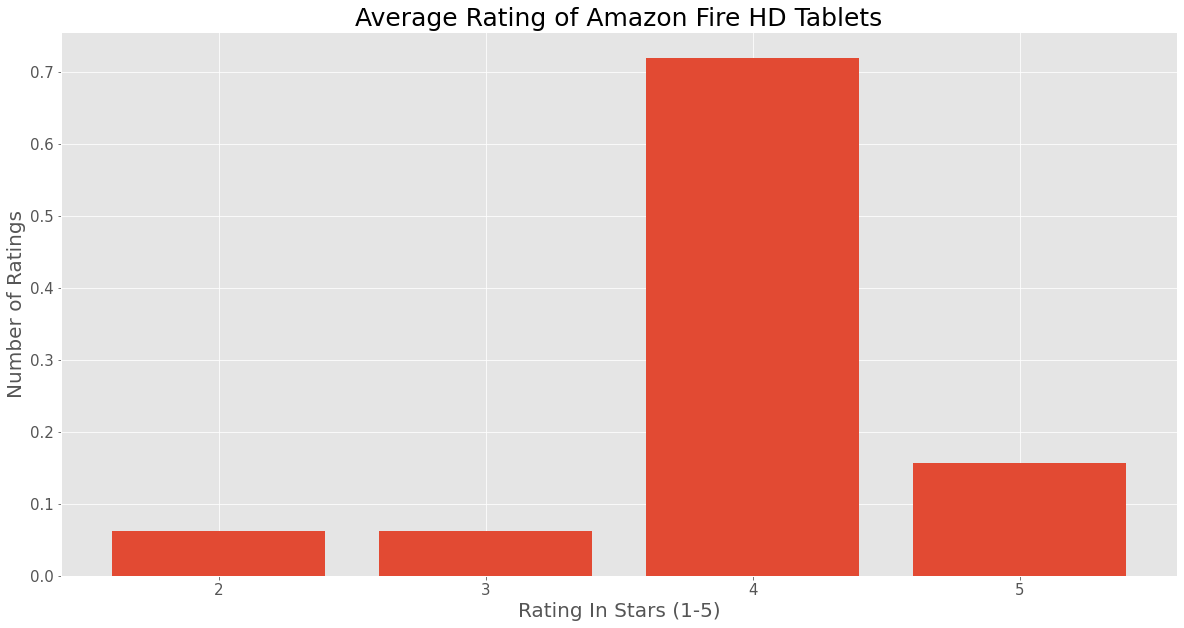

In [24]:
plt.style.use('ggplot')

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize=(20,10))
summarised_results = fire_rating_group_df

plt.bar(summarised_results.keys(), summarised_results.values/ summarised_results.sum())


plt.xlabel("Rating In Stars (1-5)", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.title("Average Rating of Amazon Fire HD Tablets", fontsize = 25)
plt.savefig("tmp/Fire_HD_Ratings.svg")
plt.show()

- As you can see overall most customers are overwhelmingly satisfed with Amazons brand of tablets. With No 1 star reviews and the vast majority of reviews being 4 stars or higher (Around 85%). Add to the fact that the Fire HD tablets are some of the most highly reviewed products on the Amazon market place its clear that most consumers opt for the Fire HD over other tablet manufactuerers 
<br>
<br>
<br>
<br>
<br>
<br>

## Price Comparisons

In [25]:
#remove $ and values with a price range, convert all items in price to float
df =df[df['price'].str.contains('-')==False]
df['price_float'] = df['price'].str.replace('$', '')
df['price_float'] = df['price_float'].str.replace(',', '')
df['price_float'] = pd.to_numeric(df['price_float'], errors='ignore')
df.dtypes


brand             object
description       object
num_reviews       object
price             object
rating            object
title             object
reviews_float    float64
first             object
price_float      float64
dtype: object

In [26]:
#filter out N/A values and outliers 
df2 = df[['brand', 'price_float', 'reviews_float', 'title']]
df2.dropna()
df2 = df2[(df2['price_float'] > 49)] 
df2 = df2[df2['reviews_float'] < 120000]
df2 = df2[df2['reviews_float'] > 10]
df2

,brand,price_float,reviews_float,title
0,Dragon,149.99,816.0,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,91.77,2099.0,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,74.99,1711.0,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,119.99,4595.0,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
5,PRITOM,89.99,235.0,Android Tablet Pritom 10 inch Android 9.0 OS T...
...,...,...,...,...
9570,Samsung,99.99,5572.0,"SAMSUNG SM-T290NZSAXAR, Galaxy Tab A 8.0"" 32 G..."
9572,Samsung,206.68,8882.0,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,Amazon,89.99,30108.0,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,Amazon,149.99,77593.0,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


### What trends can we see between the price of a product and the number of reviews? 

In [27]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Histogram, Layout

from plotly.graph_objs import Scatter


data = [Scatter(x=df2['reviews_float'], y=df2['price_float'], mode = 'markers', text=df2['brand'])]
layout = Layout(title="Number of reviews vs Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

- Most tablets on amazon fall below 2000 reviews and are between 50 to 300 dollars
- very high concentration between 40 - 150 dollars, a lot of cheap chinese brands 
<br>
<br>
<br>
<br>

## Lets compare prices to reviews of the top 7 brands 

In [28]:
#lowercase brands to make indexing easier
df2["brand"] = df["brand"].str.lower()
df2

,brand,price_float,reviews_float,title
0,dragon,149.99,816.0,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,hoozo,91.77,2099.0,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,74.99,1711.0,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,dragon,119.99,4595.0,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
5,pritom,89.99,235.0,Android Tablet Pritom 10 inch Android 9.0 OS T...
...,...,...,...,...
9570,samsung,99.99,5572.0,"SAMSUNG SM-T290NZSAXAR, Galaxy Tab A 8.0"" 32 G..."
9572,samsung,206.68,8882.0,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,amazon,89.99,30108.0,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,amazon,149.99,77593.0,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


In [29]:
#filter out the brands
df2 =df2[df2['brand'].str.contains('apple|samsung|amazon|lenovo|microsoft|asus|google')]
df2

,brand,price_float,reviews_float,title
9,samsung,249.99,345.0,"Samsung Galaxy Tab S6 Lite 10.4"", 64GB WiFi Ta..."
10,samsung,116.99,1399.0,"Samsung Galaxy Tab A 8.0"" (2019, WiFi Only) 32..."
12,lenovo,199.99,1594.0,"Lenovo Tab M10 Plus, 10.3"" FHD Android Tablet,..."
18,samsung,579.99,153.0,"Samsung Electronics Galaxy Tab S7 Wi-Fi, Mysti..."
21,samsung,162.50,831.0,"Samsung Galaxy Tab A 8.0"" (2019, WiFi + Cellul..."
...,...,...,...,...
9570,samsung,99.99,5572.0,"SAMSUNG SM-T290NZSAXAR, Galaxy Tab A 8.0"" 32 G..."
9572,samsung,206.68,8882.0,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,amazon,89.99,30108.0,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,amazon,149.99,77593.0,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


In [30]:
#had to pip install plotly.express and then plotly again to get this to work. 
import plotly.express as px
data = px.scatter(df2, x="reviews_float", y="price_float", color="brand", hover_data=['title'], 
                  labels={
                     "reviews_float": "Reviews",
                     "price_float": "Price",                  
                 },
                title="Number of reviews vs Price of Top Brands")

#layout = Layout(title="Number of reviews vs Price of Top Brands")

fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig, show_link=False)

- If we zoom in we get a better picture 
- top rated brands are more likely to have higher priced units
- Most top brands priced between 100 - 500
- Amazon only brand to have all their devices priced below 200 dollars but has highest amount of reviews
- As stated before Microsoft and Samsung have most listed devices on Amazon (of top brands), yet their devices have a low number of reviews. Why is this? 
- Possible factors: Expensive, too many variations cause data to spread out
- only brands with over 5k reviews: Samsung, Apple, Amazon
- From personal experience these 3 brands are the most common tablets I have seen 
- Microsoft and Apple have most expensive. Most likely due to surface and iPad being marketed more as a portable computer with higher specs. 
- Problems: Couldnt scrape prices for every device, if a device was out of stock the spider scraped N/A
- Due to holiday season many products may be out of stock. All prices shown are also lowest available so prices will change after holiday seasons. 
<br>
<br>
<br>
<br>

# Word Cloud Analysis
## What words do Sellers use to market their Tablets? 
### Word Cloud of All Descriptions 
- Descriptions parsed into a List by each line or bullet point via scrapy  
- Due to the high variance of the technical details page, the description was the best place to parse technical infomation 

In [31]:
from wordcloud import WordCloud

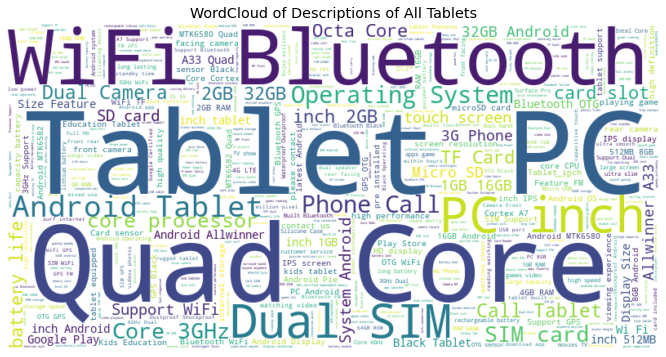

In [32]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df['description']))

#show

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Descriptions of All Tablets")
plt.savefig("tmp/WC_Descriptons_All.svg")
plt.show()

##### As We can see the most common features listed are: 
- Tablet PC
- WiFi
- Bluetooth
- Quad Core
- Dual SIM
- Android Tablet
- Core 1.3GHz
- 16GB / 32GB
- touch screen 



###### So we can say the most popular tablets have at minium these features: WiFi, Bluetooth, A quad core processor, Running Android OS, Dual Sim capability, either 16GB or 32 GB internal memory, 1.3Ghz processing speed, and of course a touch screen. 
<br>
<br>
<br>
<br>
<br>

### Now what are the most common features implemented in the Fire HD Tablet? 

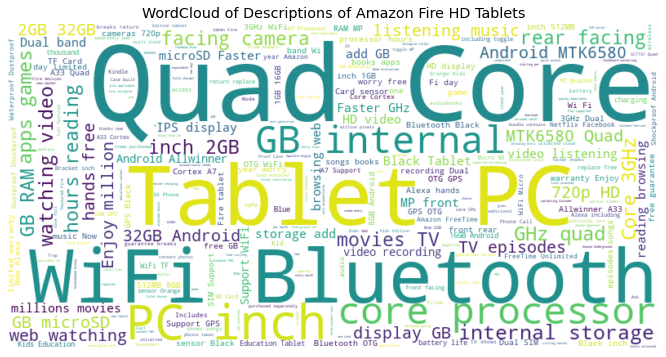

In [33]:
#fire_df is dataframe of only Fire HD products 

wc.generate(' '.join(fire_df['description']))

#show

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Descriptions of Amazon Fire HD Tablets")
plt.savefig("tmp/WC_Descriptons_FireHD.svg")
plt.show()

#### As We can see the most common features listed are: 
- Fire Tablet 
- watching video
- web watching 
- listening music
- Quad Core
- hands free
- hours reading 



##### We can infer from the word cloud that Amazon markets its tablets more towards people looking to do light tasks such as reading, web browsing, and watching videos on their tablet. 
<br>
<br>
<br>
<br>
<br>

# Conclusion:

- Amazon dominates the market on basic tablets for simple every day tasks such as watching videos, reading articles, web browsing, and video conferencing.

- They have the highest rated product having primarily 4-5 star reviews and the highest number of reviews of any other tablet on the Amazon marketplace.

- They have a wide selection of different types of tablets by size, memory, performance, and even kids versions.

- Their product is easily affordable compared to other brands such as the Microsoft Surface or Apple iPad, and their tablets regularly come on sale or include deals.

-  Some of them even come built in with the voice assistant Alexa. 

#### Overall the Amazon Fire HD tablet is one of the most reliable tablets you can buy for the money, with solid performance, good battery life, and stellar reviews all across the board you cant go wrong with a Fire HD. 

## From a business stand point
- Amazon could benefit from creating more high end tablets similar to the iPad or Microsoft surface. 
- Amazon has clearly demonstrated that they have the capability to create a reliable tablet computer for a fraction of the cost of its competitors. 
- If amazon increased the specs of its tablets and released more variations like other brands I could see them fully dominating the tablet/ portable pc market. 

# Going Forward
- Add more detailed price comparisons of most popular brands
- Comparison of specs between most popular devices by using N-gram to get a more detailed list 
- Create more interactive charts 
- Continue cleaning data, unforunately even when setting the filters on amazon.com to "electronics" and "Tablets", there are still several entries scraped which were not Tablets. Even after all the data cleaning there are still a few items that are not tablets in the dataframe. 
- There are items listed such as: Clothing, accessories, books, automotive parts, etc. Though not present in high enough frequencies to have an impact on the analysis, these should still be cleaned out.
- Include Review information and more comparisons between Amazons primary competitiors
